## Fashion classification 

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd /Users/My HP Pavilion/Desktop/data science

C:\Users\My HP Pavilion\Desktop\data science


### loading data

In [3]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')

In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

### converting data in array form and standardizing it. 

In [5]:
training = np.array(fashion_train_df, dtype ='float32')

In [6]:
testing =  np.array(fashion_test_df, dtype ='float32')

In [7]:
X_train = training[:,1:]/255
Y_train = training[:,0]

In [8]:
X_test = testing[:,1:]/255
Y_test = testing[:,0]

### Spliting data into training and  testing 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_validation , Y_train , Y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state =12345)

In [11]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1) )
X_test = X_test.reshape(X_test.shape[0],*(28,28,1) )
X_validation = X_validation.reshape(X_validation.shape[0],*(28,28,1) )

In [12]:
X_validation.shape

(12000, 28, 28, 1)

In [13]:
import keras

Using TensorFlow backend.


#### Importing type of model,different layers and optimizer to make our CNN model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 3, 3, input_shape =(28, 28, 1),activation ='relu'))
cnn_model.add(MaxPooling2D(pool_size =(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation ='relu'))
cnn_model.add(Dense(output_dim = 10, activation ='sigmoid'))

C:\Users\My HP Pavilion\Anaconda3\New folder\envs\py-TF\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
C:\Users\My HP Pavilion\Anaconda3\New folder\envs\py-TF\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
C:\Users\My HP Pavilion\Anaconda3\New folder\envs\py-TF\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [16]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [17]:
epochs = 50

### Training model for 50 epochs on training data and validating it on validation data to avoid overfitting

In [18]:
cnn_model.fit(X_train,
             Y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data = (X_validation, Y_validation))

C:\Users\My HP Pavilion\Anaconda3\New folder\envs\py-TF\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 41s 857us/step - loss: 0.8994 - acc: 0.7034 - val_loss: 0.5057 - val_acc: 0.8204
Epoch 2/50
48000/48000 [==============================] - 39s 814us/step - loss: 0.4759 - acc: 0.8326 - val_loss: 0.4368 - val_acc: 0.8445
Epoch 3/50
48000/48000 [==============================] - 41s 858us/step - loss: 0.4233 - acc: 0.8517 - val_loss: 0.4162 - val_acc: 0.8518
Epoch 4/50
48000/48000 [==============================] - 43s 895us/step - loss: 0.3866 - acc: 0.8641 - val_loss: 0.3757 - val_acc: 0.8674
Epoch 5/50
48000/48000 [==============================] - 46s 950us/step - loss: 0.3625 - acc: 0.8745 - val_loss: 0.3588 - val_acc: 0.8752
Epoch 6/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3450 - acc: 0.8795 - val_loss: 0.3372 - val_acc: 0.8840
Epoch 7/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3325 - acc: 0.8845 - val_loss: 0.3364

### Evaluating our model on testing data

In [19]:
evaluation = cnn_model.evaluate(X_test, Y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 332us/step
Test Accuracy : 0.913


In [20]:
predicted_classes = cnn_model.predict_classes(X_test)

### Printing true class and predicted class together.

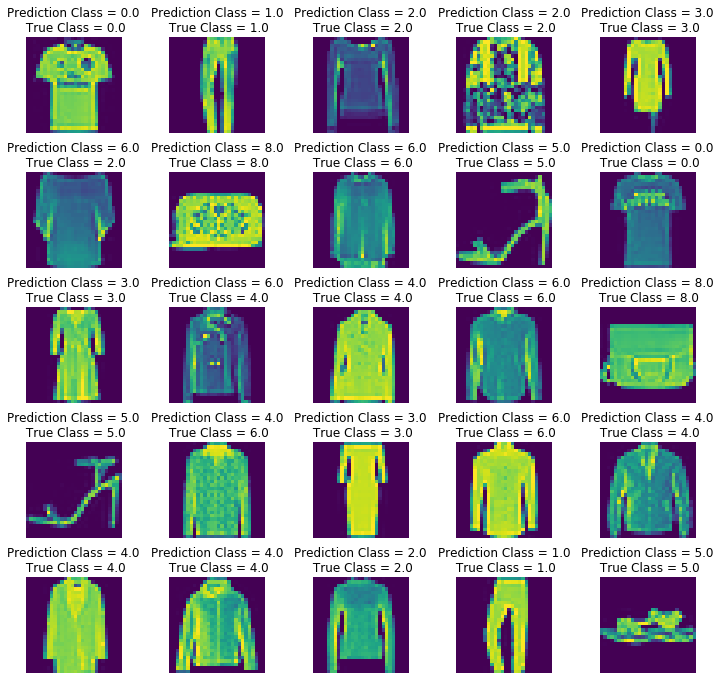

In [21]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)    

### Heatmap

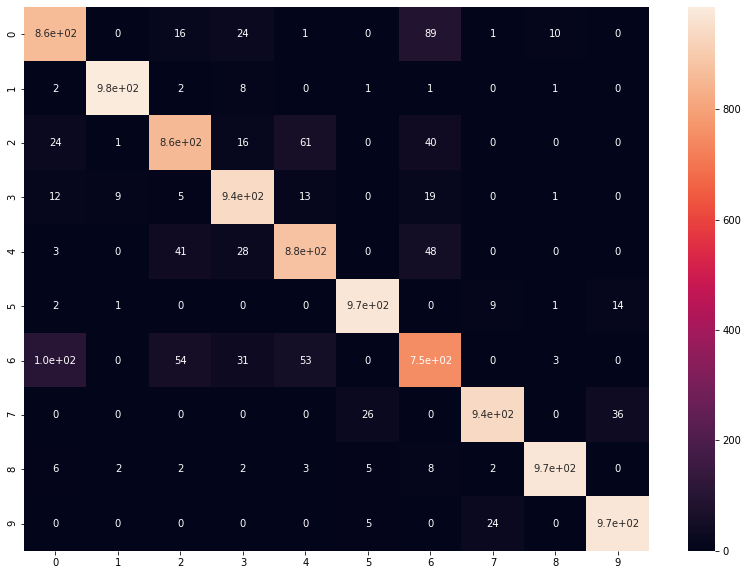

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

### Classification report

In [23]:
from sklearn.metrics import classification_report

num_classes=10
target_names =["class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.86      0.85      1000
     class 1       0.99      0.98      0.99      1000
     class 2       0.88      0.86      0.87      1000
     class 3       0.90      0.94      0.92      1000
     class 4       0.87      0.88      0.88      1000
     class 5       0.96      0.97      0.97      1000
     class 6       0.79      0.75      0.77      1000
     class 7       0.96      0.94      0.95      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

